# Trending Topic 3: International Women's Day & COVID-19

In [268]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import re
pd.set_option('max_colwidth',1000)

# 1. Filter to Topic (International Women's Day)

In [168]:
df = pd.read_csv('COVID19Tweets_HA_final_v2.csv')
df = df.iloc[:,2:]
df['tags'].fillna(value = 'Not available', inplace = True)
df.sample(5)

,Tweet Id,text,Tweet Datetime,Source,tags,Retweets,Favorites,Twitter @ Name,user loc,verified,followers,tweets
19494,1368932790050451457,Adrienne Beatty authored the clientalert The SBA has Updated the Paycheck Protection Program to Encourage Mor co IG3tWhlWt1,2021-03-08 14:33:05,Constant Contact - Social Posts,"clientalert,SBA",0,0,Klehr_Harrison,"Philadelphia, PA",False,280,679
27741,1370080259907944451,UTMB s Dr Shi and Dr Weaver were on yesterday to talk about Covid19 variants vaccines masks and more Y,2021-03-11 18:32:43,Twitter Web App,"Covid19,vaccines",3,0,UTMBProvost,Galveston,False,717,3630
10490,1368980882464313354,This morning released data looking into peoples hesitancy towards the COVID19 vaccine between 13 January and co OKQXWxEfaQ,2021-03-08 17:44:11,Twitter Web App,COVID19,0,2,NHSProviders,London,False,22129,23674
9709,1368985247354916866,We are proud of all the young women who ChooseToChallenge the Non inclusion of Women in peacebuilding amidst the co y2vMSNGjYi,2021-03-08 18:01:32,Twitter for Android,"ChooseToChallenge,peacebuilding",2,3,yiavha,"Jos, Nigeria",False,648,949
16546,1368950571378630662,The Ambassadors of the EUMember States in Greece along with the Secretariat General for Greeks Abroad and Public D co 0f8pRjvyOf,2021-03-08 15:43:44,Twitter for iPhone,EUMember,0,0,GreeceRomania,NaN,False,131,637


In [169]:
df.shape

(34081, 12)

In [31]:
word_list = ['women','internationalwomensday', 'iwd']
total_df = pd.DataFrame()

for word in word_list:
    total_df = total_df.append(df[df['text'].str.contains(word)])
    total_df = total_df.append(df[df['tags'].str.contains(word)])

total_df.drop_duplicates(subset=['text'], keep='first')
total_df.shape

(2025, 12)

In [32]:
total_df.sample(5)

,Tweet Id,text,Tweet Datetime,Source,tags,Retweets,Favorites,Twitter @ Name,user loc,verified,followers,tweets
2535,1369029547484733441,Happy International Women s Day On iwd2021 let us reflect on the contributions women made to society recognize the,2021-03-08 20:57:34,Twitter for iPhone,"iwd2021,women",5,0,matisridhar,DC (via Singapore & Madras),False,481,4772
14620,1368960399094280201,Happy InternationalWomensDay Let s celebrate the women girls around the world shaping a more equal future recover,2021-03-08 16:22:47,NaN,"InternationalWomensDay,women,girls",1,0,SDGsCoLab,"Palo Alto, CA",False,1825,26039
13721,1368964513400229890,On InternationalWomensDay Hats off to all women specifically female staff for their dedication power and deter,2021-03-08 16:39:08,Twitter Web App,InternationalWomensDay,4,0,kckitty,"St. Joseph, MO",False,924,234296
6056,1369008008097722375,8M2021 internationalwomensday2021 We stop because COVID19 has once again proven that economic systems depend and t,2021-03-08 19:31:58,Twitter for Android,"8M2021,internationalwomensday2021,COVID19",8,0,apwld,Asia Pacific,True,5293,9477
18868,1368937056139935747,Today is internationalwomensday2021 Women are at the frontlines of the COVID19 response and we thank them for th co 6Rqwg7TN0o,2021-03-08 14:50:02,Twitter Web App,"internationalwomensday2021,COVID19",0,2,CCIntlhealth,"Washington, D.C.",False,1549,4022


In [33]:
# save to csv
total_df.to_csv('Topic3_IntlWomensDay_Tweets.csv')

### EDA

In [145]:
total_df['user loc'].value_counts().head(10)

Washington, DC         77
New York, NY           46
Canada                 37
Global                 34
Geneva, Switzerland    25
Washington, D.C.       21
New York, USA          20
Toronto, Ontario       17
Paris, France          13
Ottawa, Ontario        12
Name: user loc, dtype: int64

In [150]:
total_df['Tweet Datetime']= pd.to_datetime(total_df['Tweet Datetime'])
total_df['Date Only'] = [d.date() for d in total_df['Tweet Datetime']]
total_df['Date Only'].value_counts()

2021-03-08    1905
2021-03-11     120
Name: Date Only, dtype: int64

In [163]:
total_df.describe()

,Tweet Id,Retweets,Favorites,followers,tweets
count,2.025000e+03,2025.000000,2025.000000,2.025000e+03,2.025000e+03
mean,1.369046e+18,7.328889,4.530864,4.180378e+04,2.837379e+04
std,2.618513e+14,31.214125,37.456802,4.707473e+05,1.085178e+05
min,1.368921e+18,0.000000,0.000000,0.000000e+00,4.000000e+00
25%,1.368952e+18,1.000000,0.000000,4.200000e+02,1.388000e+03
50%,1.368983e+18,2.000000,0.000000,1.597000e+03,4.685000e+03
75%,1.369019e+18,5.000000,2.000000,5.594000e+03,1.578400e+04
max,1.370104e+18,936.000000,1322.000000,9.121527e+06,2.804002e+06


# 2. Load Sentiment Analysis from JSL

In [34]:
# load csv
tweet_sentiment = pd.read_csv('twitter_sentiment_topic.csv')
tweet_sentiment['sentiment'] = tweet_sentiment['sentiment'].str.strip()
print(tweet_sentiment.shape)
tweet_sentiment.head()

(2025, 2)


,text,sentiment
0,Inclusion in s list of women sharing lessons learnt during the pandemic went above beyond my expectations Taiwan is,negative
1,During COVID19 progress on gender equality has regressed We ve seen 1 Appalling increases in violence against women2 R,negative
2,Happy International WomensDay This year we celebrate the tremendous efforts by women and girls around the world in shapi,positive
3,On InternationalWomensDay join us in paying tribute to all the women standing at the front lines of the COVID19 crisis Whe,positive
4,IWD2021 ICGEB celebrates its women scientists in leadership and their efforts to shape a more equitable future and the recover,positive


In [36]:
tweet_sentiment['sentiment'].value_counts()

positive    1488
negative     479
neutral       58
Name: sentiment, dtype: int64

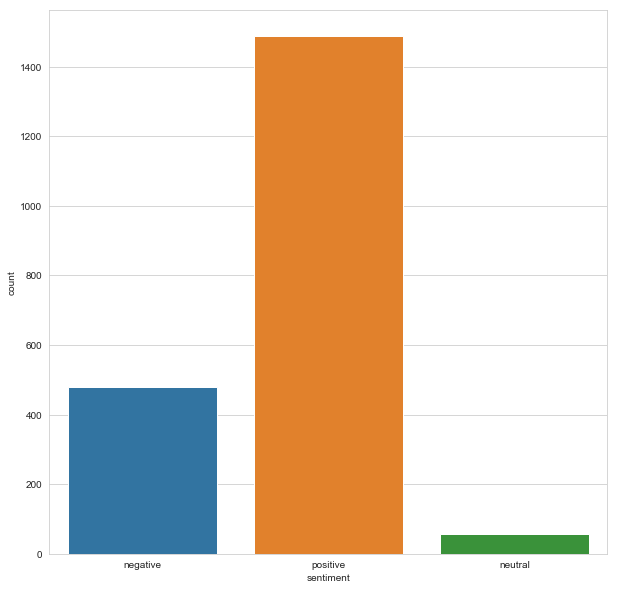

In [41]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment", data=tweet_sentiment)

In [43]:
tweet_sentiment[tweet_sentiment['sentiment']=='negative'].sample(5)

,text,sentiment
1685,Involving women in the decision making process on the allocation and disbursement of emergency funding will allow the world t,negative
115,Since COVID19 hit 55 of U S job losses have been felt by women Globally women s job losses are 1 8x greater t co nCyta4JzTd,negative
1750,internationalwomensday2021 The Dignity of time middle class working mother co yJpsBON3vaCOVID19,negative
710,These Black women are on the frontlines of the fight against Covid19 co hyN5lnMDGh co 4Q4kELXKob,negative
1,During COVID19 progress on gender equality has regressed We ve seen 1 Appalling increases in violence against women2 R,negative


In [44]:
tweet_sentiment[tweet_sentiment['sentiment']=='neutral'].sample(5)

,text,sentiment
1001,We know women are more likely to be represented in some of the sectors hardest hit by COVID19 including tourism co 13DsBFRcwJ,neutral
855,While there is still a long way to go for women in globalhealth to get the recognition at all levels in all pla co Z4pge4ZP7Y,neutral
1737,Just a few of the thousands of women polio personnel fighting COVID19 around the world Alongside work to EndPolio,neutral
534,From the leaders of Without women one cannot govern well Out of the Covid19 crisis into a worl co fGajdppZwX,neutral
1436,COVID19 continues to disproportionately impact women It s time to give them the tools they need to prioritize digi,neutral


In [45]:
tweet_sentiment[tweet_sentiment['sentiment']=='positive'].sample(5)

,text,sentiment
1461,The availability of DigitalHealth resources to support women with addictions is critical during COVID19 Access s co liwa4ZuIDr,positive
1265,The recovery from COVID19 is the perfect opportunity to support women s professional development Join us for a conv,positive
1716,internationalwomensday2021 Celebrated at CSIR CMERI Women Researchers Scientists Students participated,positive
341,While we celebrate we must also ChooseToChallenge gender inequality To take action for the 47 million more women being,positive
1357,In honor of IWD join Counterpart in supporting women leaders of local orgs around the world who continue to serve co 4leMTeOVyX,positive


# 3. Key Words - Total Topic

In [179]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
import random
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\willm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\willm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [180]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [181]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50,color_func=grey_color_func)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')


### Tweets

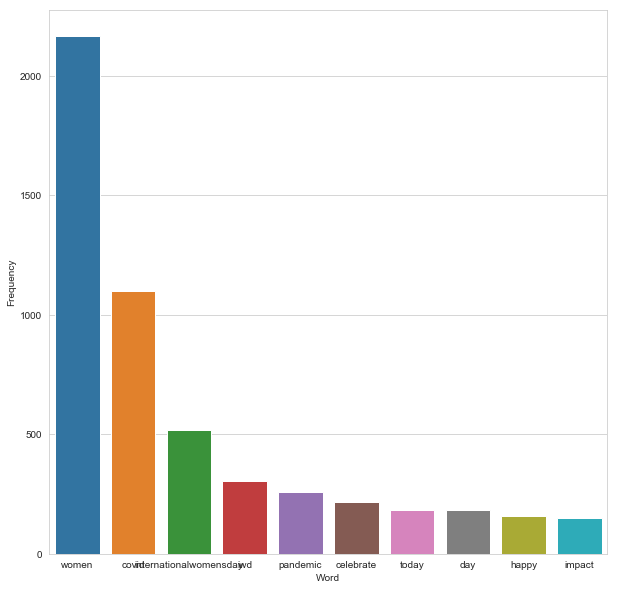

In [52]:
top_N = 100

a = total_df['text'].str.lower().str.cat(sep=' ')
b = re.sub('[^A-Za-z]+', ' ', a)

#remove the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_tweet = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate distribution
word_dist = nltk.FreqDist(cleaned_tweet)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))

In [53]:
rslt.head(25)

,Word,Frequency
0,women,2167
1,covid,1099
2,internationalwomensday,517
3,iwd,306
4,pandemic,259
5,celebrate,215
6,today,184
7,day,182
8,happy,159
9,impact,148


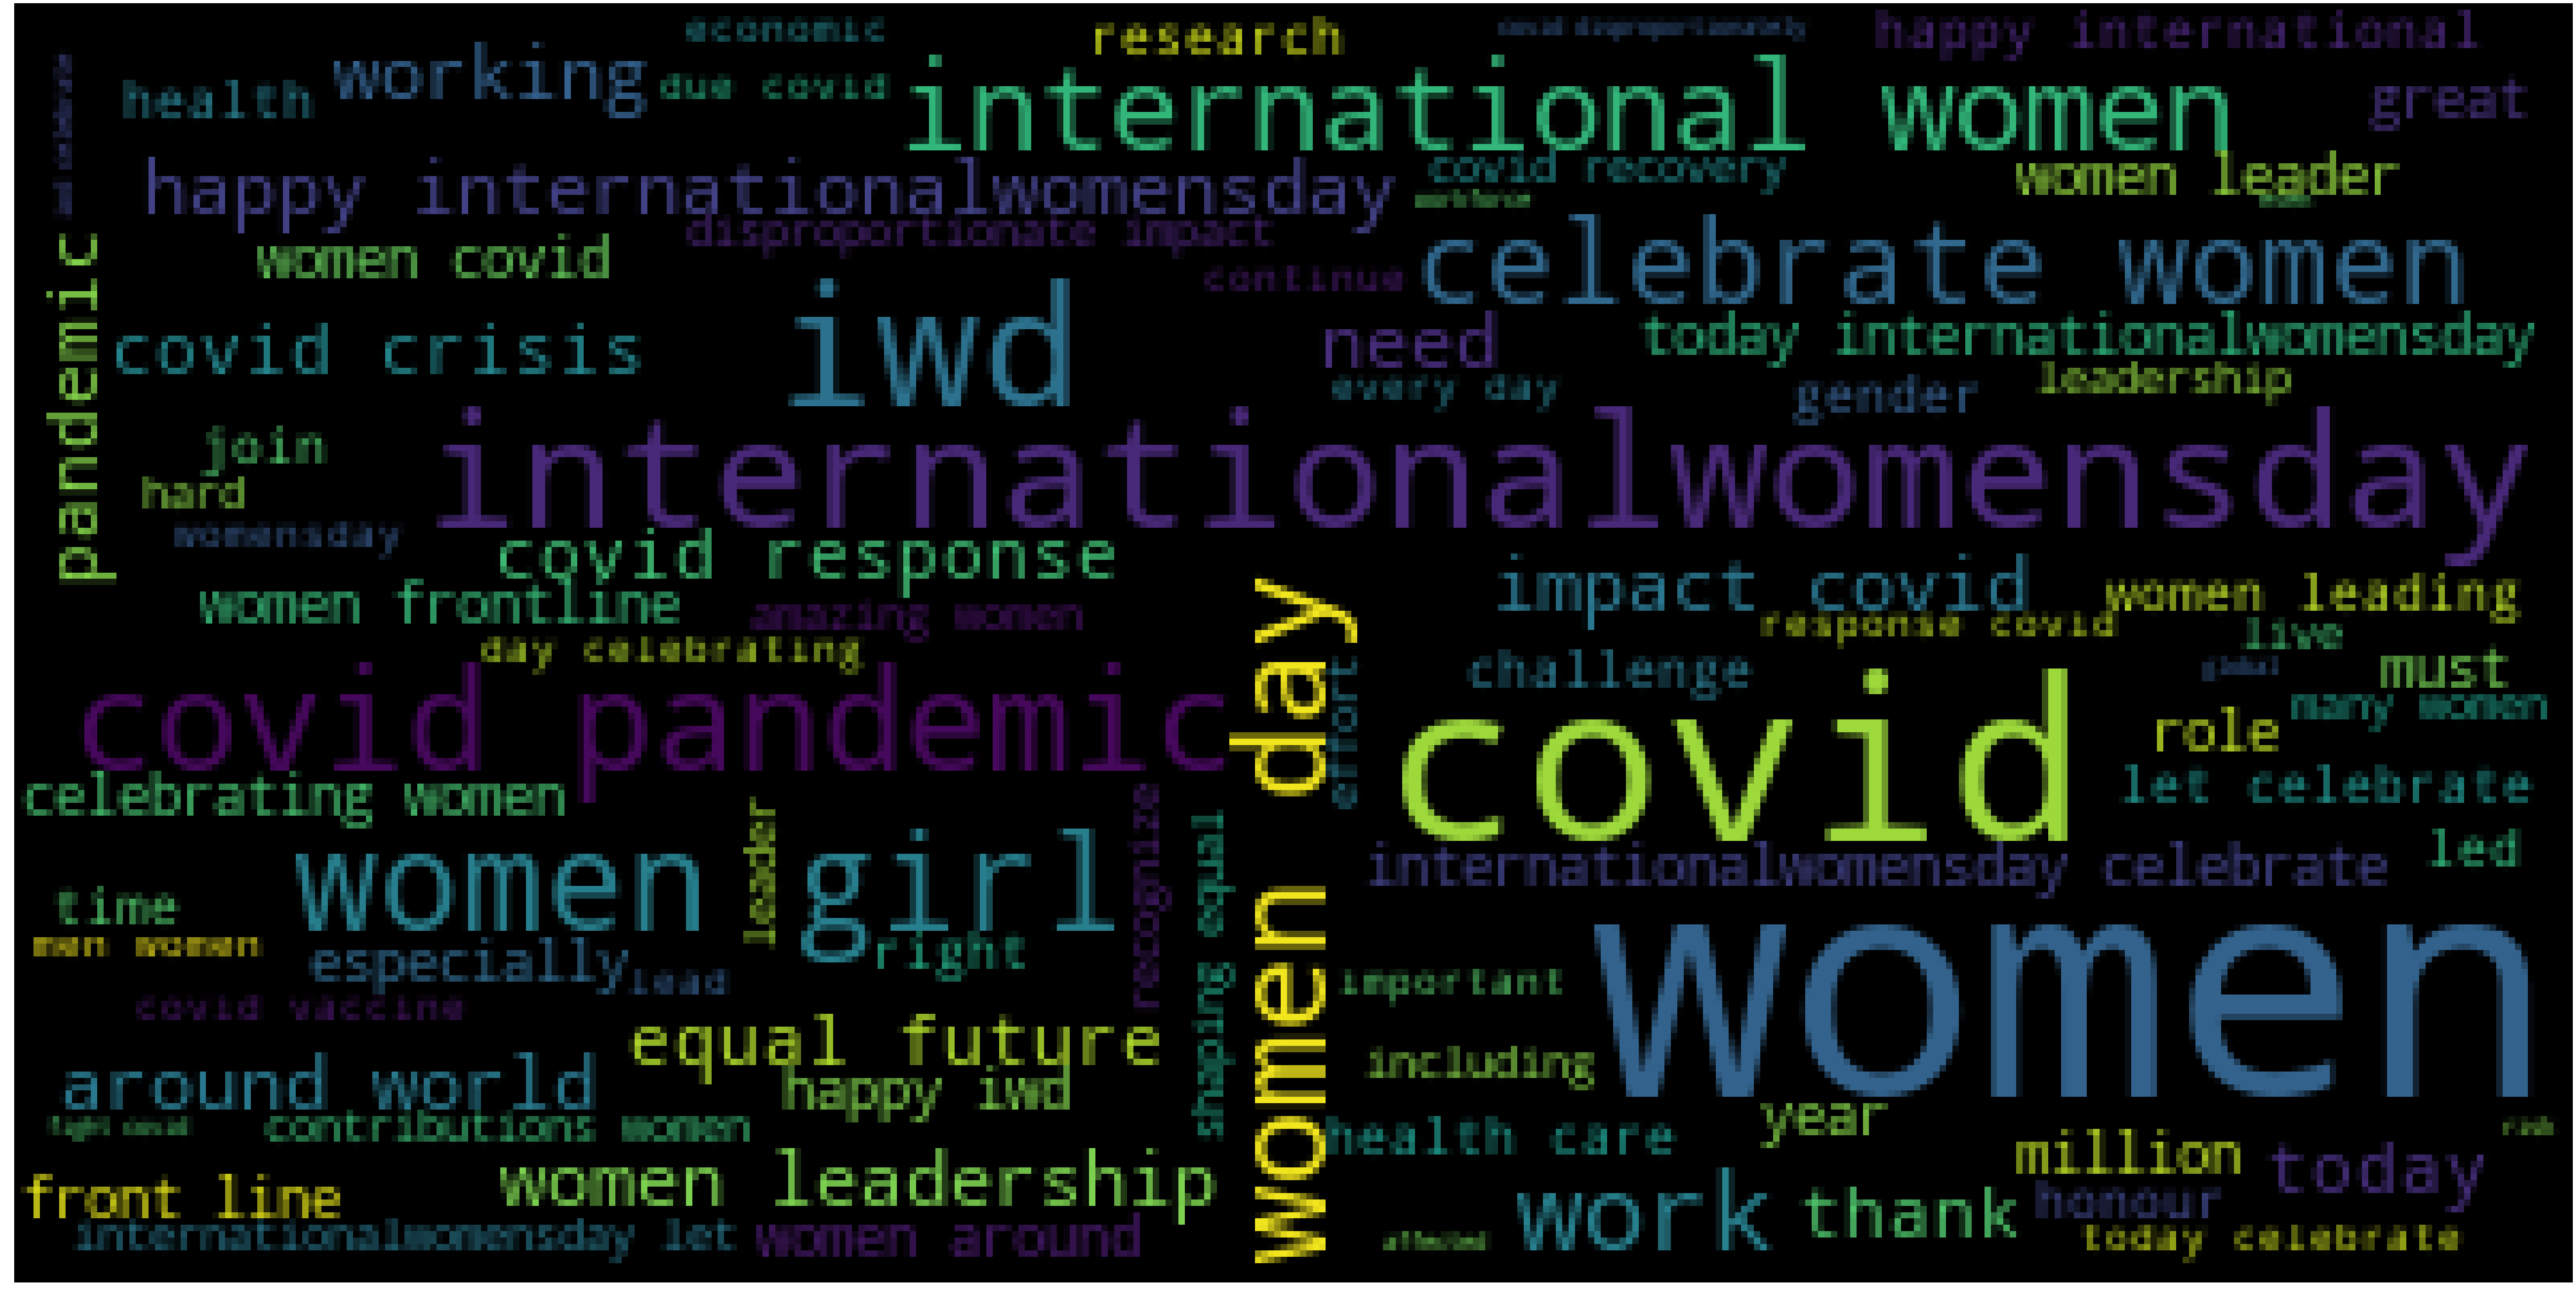

In [54]:
# Top words on tweets
wc(cleaned_tweet,'black','Common Words' )

### Tags

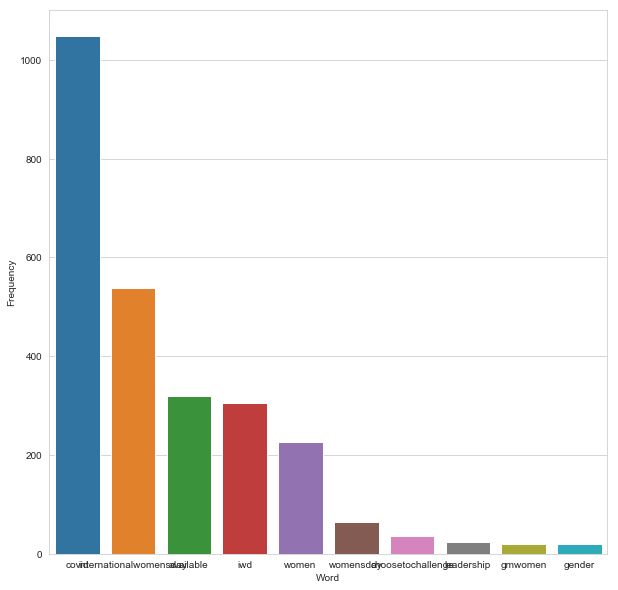

In [55]:
top_N = 100

a = total_df['tags'].str.lower().str.cat(sep=' ')
b = re.sub('[^A-Za-z]+', ' ', a)

#remove the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_tweet = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate distribution
word_dist = nltk.FreqDist(cleaned_tweet)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))

In [56]:
rslt.head(25)

,Word,Frequency
0,covid,1048
1,internationalwomensday,538
2,available,320
3,iwd,305
4,women,226
5,womensday,64
6,choosetochallenge,36
7,leadership,23
8,gmwomen,20
9,gender,19


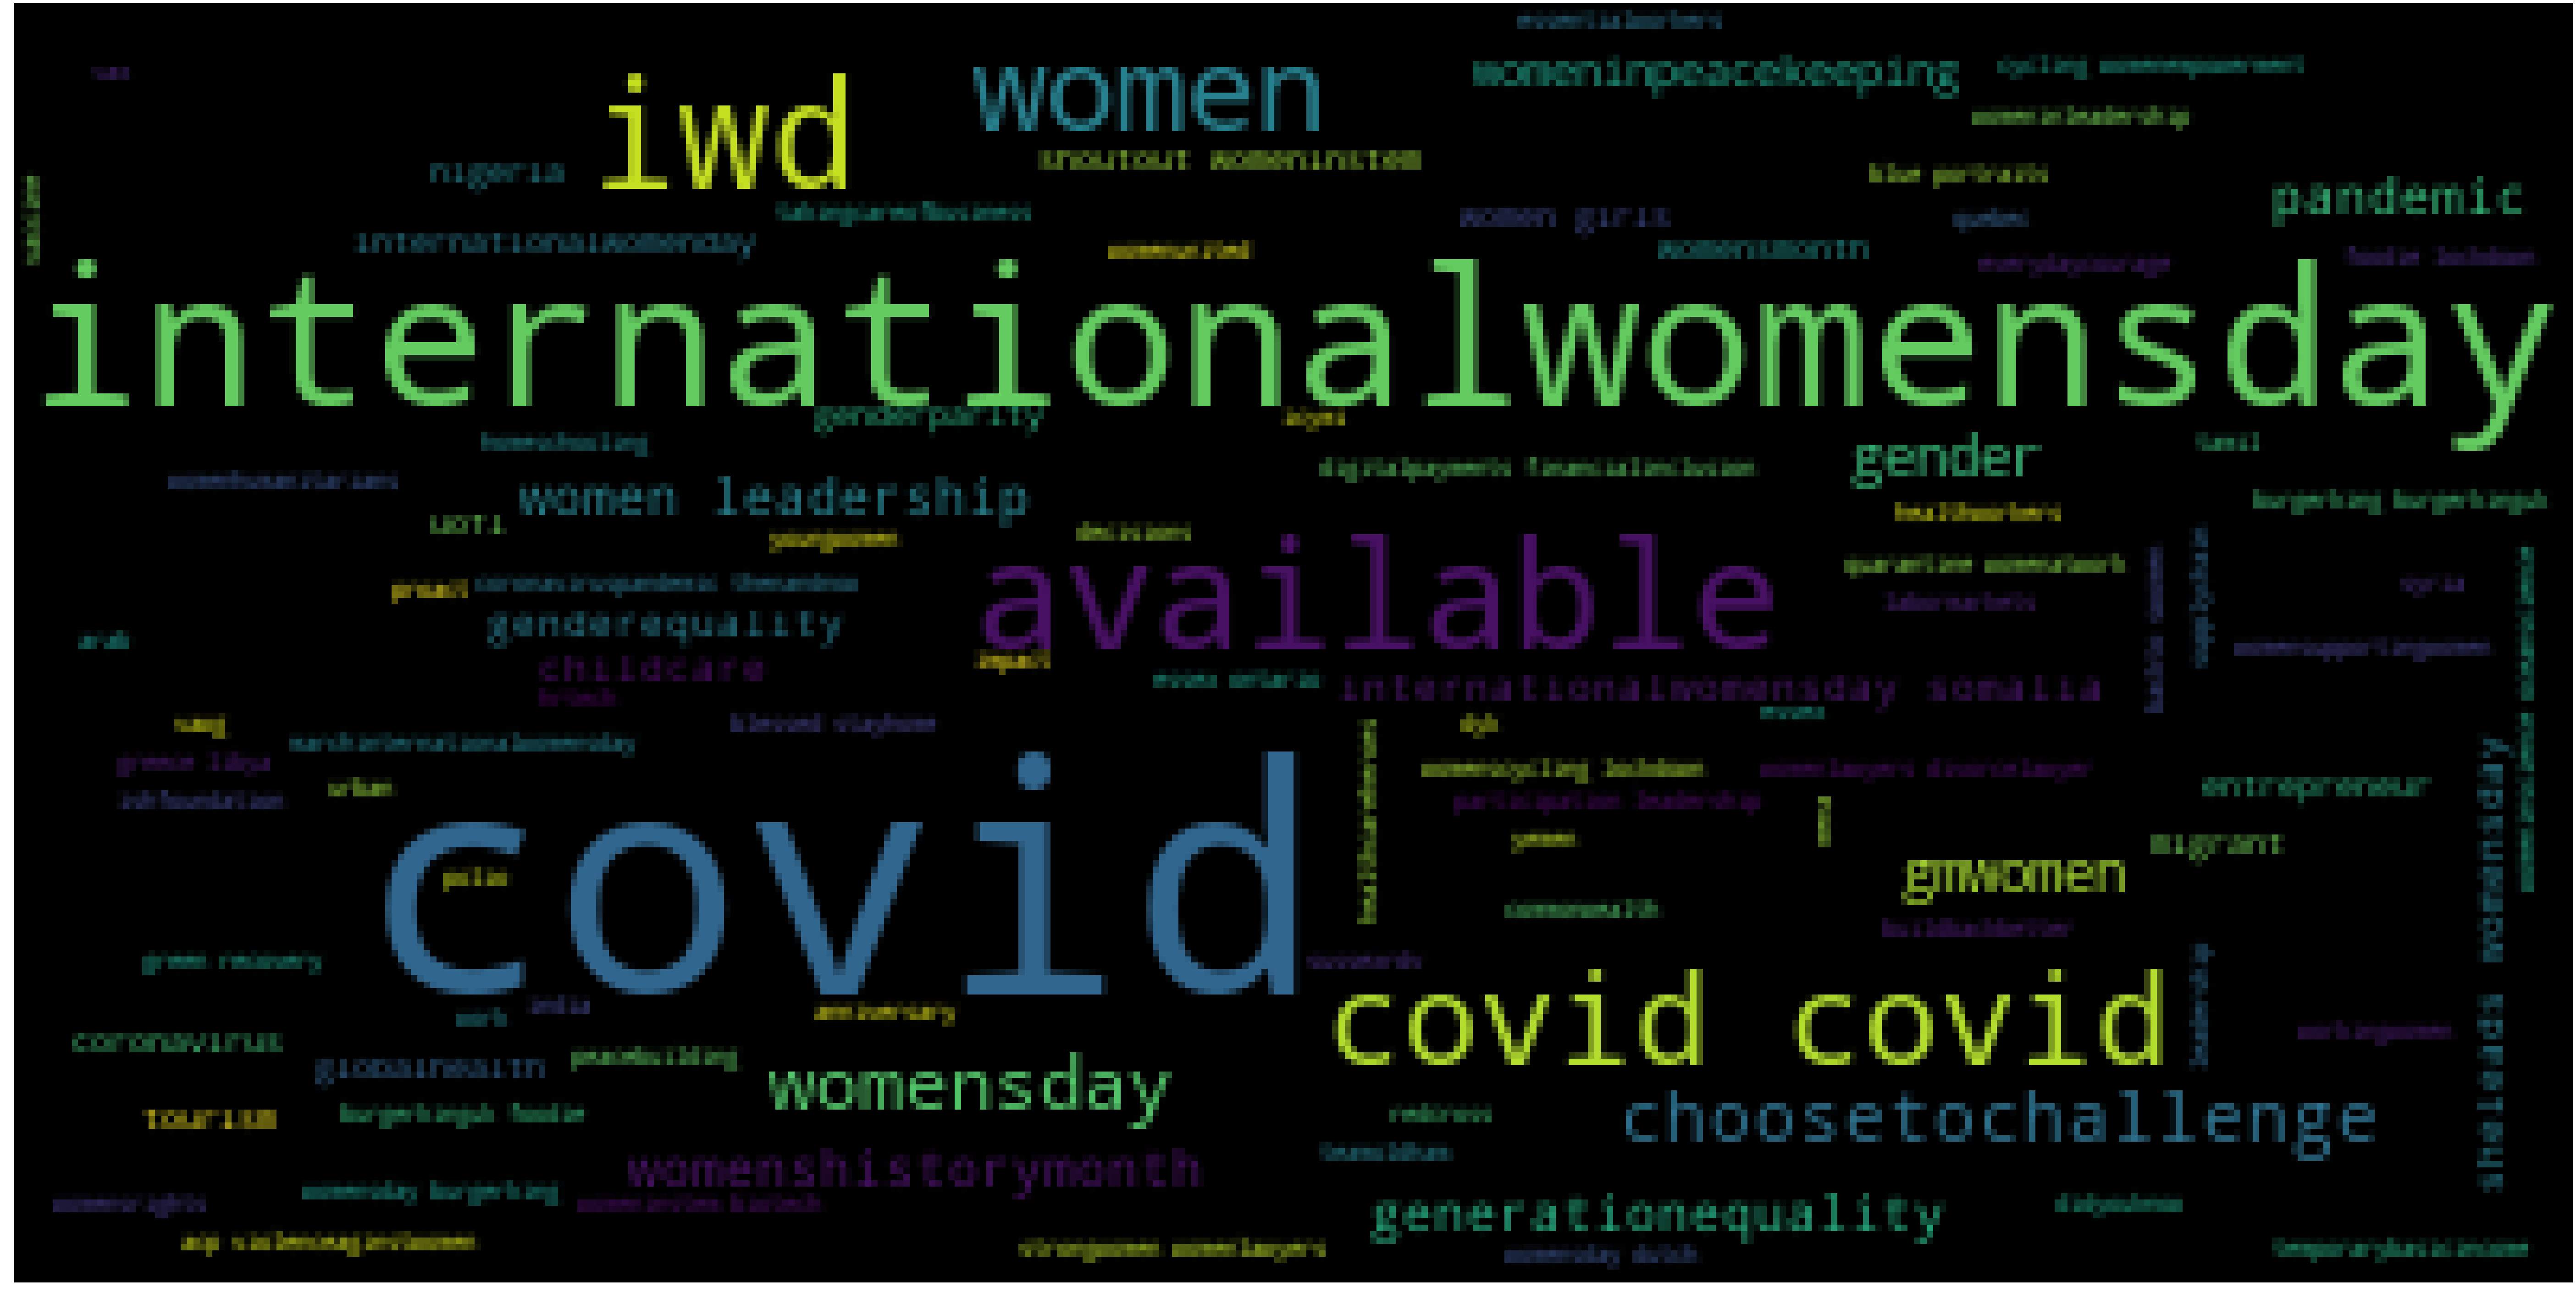

In [172]:
# Top words on tweets
wc(cleaned_tweet,'black','Common Words' )

# 3. Key Words Analysis

## 3a. Key Words - Positive Sentiment

In [65]:
pos_women_tweets = total_df.reset_index(drop=True)[tweet_sentiment.reset_index(drop=True)['sentiment']=='positive']
pos_women_tweets.shape

(1488, 12)

In [ ]:
top_N = 100

a_pos = pos_women_tweets['text'].str.lower().str.cat(sep=' ')
b_pos = re.sub('[^A-Za-z]+', ' ', a_pos)

#remove the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_pos = word_tokenize(b_pos)
filtered_sentence_pos = [w for w in word_tokens_pos if not w in stop_words]
filtered_sentence_pos = []
for w in word_tokens_pos:
    if w not in stop_words:
        filtered_sentence_pos.append(w)

# Remove characters which have length less than 2  
without_single_chr_pos = [word for word in filtered_sentence_pos if len(word) > 2]

# Remove numbers
cleaned_tweet_pos = [word for word in without_single_chr_pos if not word.isnumeric()]        

# Calculate distribution
word_dist_pos = nltk.FreqDist(cleaned_tweet_pos)
rslt_pos = pd.DataFrame(word_dist_pos.most_common(top_N),
                    columns=['Word', 'Frequency'])

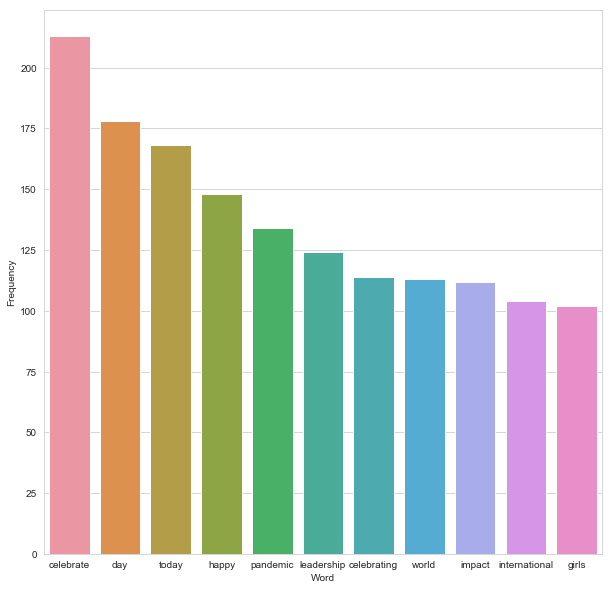

In [73]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt_pos[4:15])

In [137]:
rslt_pos.head(40)

,Word,Frequency
0,women,1609
1,covid,712
2,internationalwomensday,439
3,iwd,250
4,celebrate,213
5,day,178
6,today,168
7,happy,148
8,pandemic,134
9,leadership,124


In [86]:
common_words = {'women','covid','internationalwomensday','iwd','pandemic'}
cleaned_tweet_pos_uncommon = [word for word in cleaned_tweet_pos if word not in common_words]

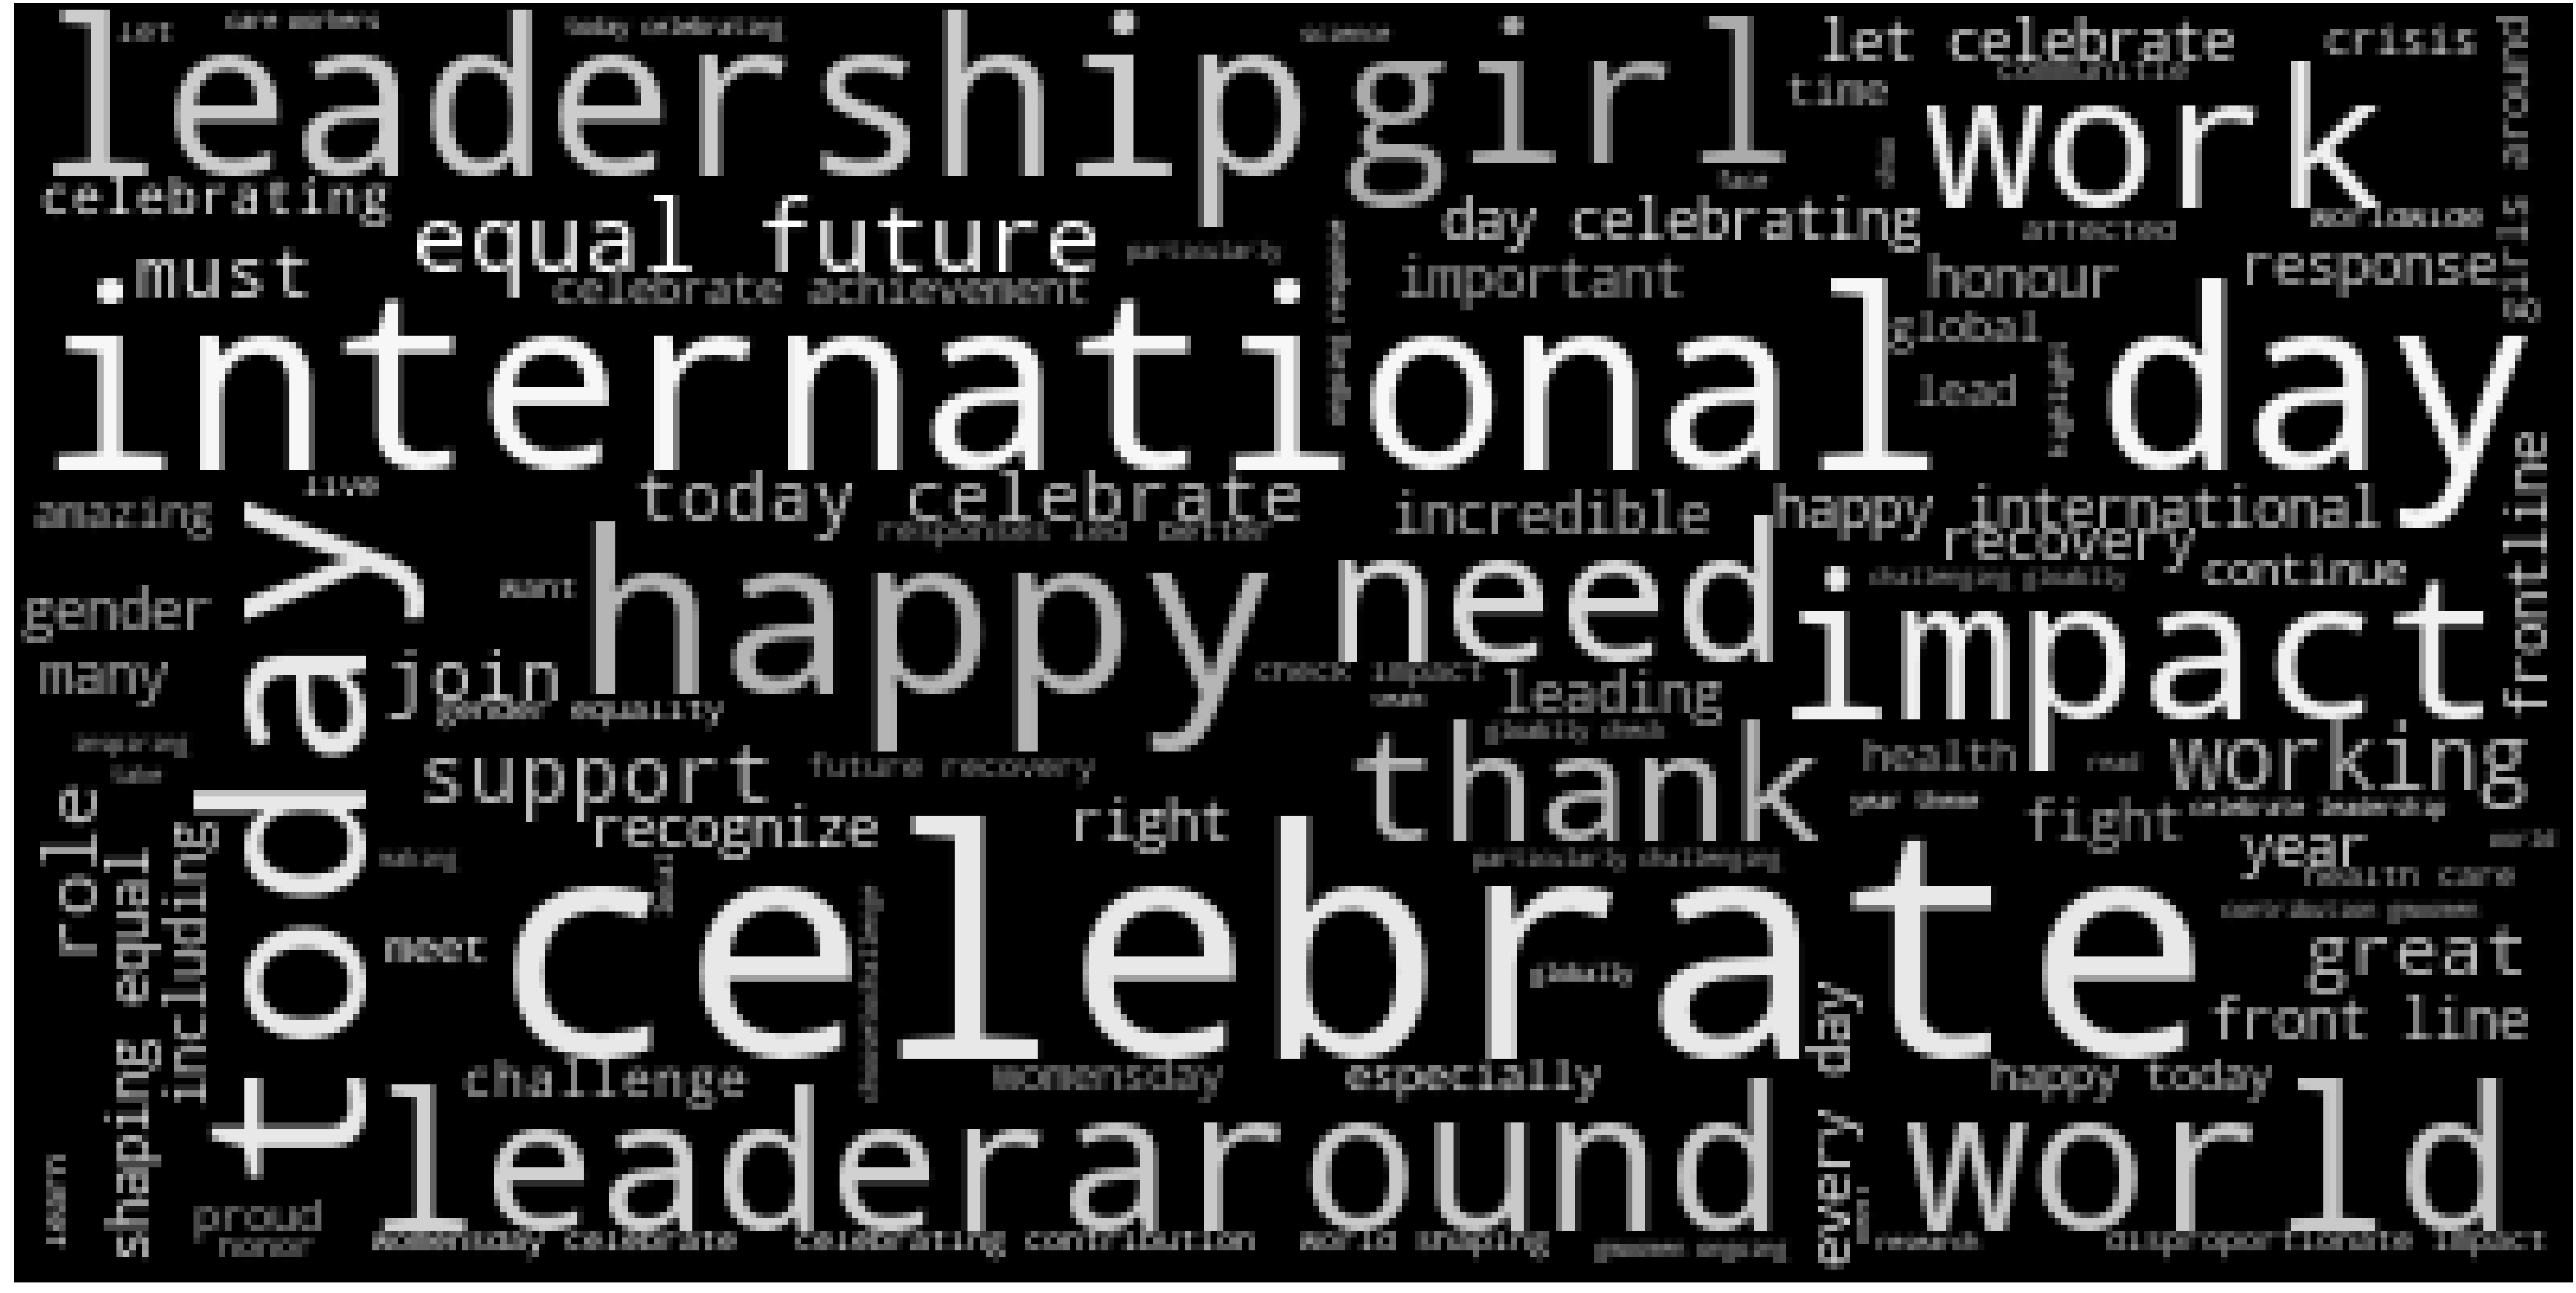

In [182]:
# Top words on tweets
wc(cleaned_tweet_pos_uncommon,'black','Common Words' )

In [206]:
# Sample tweets based on certain words
pd.DataFrame(pos_women_tweets[(pos_women_tweets['text'].str.contains('recovery')) & (tweet_sentiment['sentiment']=='positive')]['text']).sample(10)

C:\Users\willm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,text
670,Our IWD21 brief on COVID19 recovery calls for Increasing women s participation representation leadership NO dis
1578,For a green just recovery post COVID19 we need all women and girls to have the power to make their voices he co pShuYj5krP
1958,Today we celebrate women s incredible efforts during the COVID19 pandemic response and recovery internationalwomensday
207,IWD2021 celebrates the important leadership roles of women and girls in shaping a more equal future and recovery from the COVI
1412,In the fight against COVID19 on the road to small business recovery we must focus on women entrepreneurs which the pandem
191,SheLeadsThis WomensDay we celebrate women s efforts in shaping a more equal future amid COVID19 recovery Women like J
1093,For IWD2021 celebrate women leading the change to equal future inclusive COVID19 recovery sustainab
13,Rapid recovery from COVID19 depends on unlocking the potential of all of our people men and women WATCH Tax and Gend
371,Hear the voices of 5 women who are leading COVID19 recovery in their communities From South Africa to Mexico they are b
1501,Hear priorities for post COVID19 recovery from3 women leading 3 organizations leading global trade on co U0AbwvGZTV


##### Find tweets with most common words

In [144]:
from itertools import chain

top_pos = list(rslt_pos.iloc[5:,0])

word_set_pos = set(chain.from_iterable(top_pos))
res_pos = [len(word_set_pos & set(text.split())) for text in pos_women_tweets['text']]

pd.concat([pos_women_tweets['text'].reset_index(drop=True), pd.DataFrame(res_pos)], axis=1).sort_values(by=0, ascending=False).head(10)

,text,0
843,If this quote is real t s only taken a year for to acknowledge the impact of COVID 19 on women Nice co E5jpZZ9kUR,3
60,ICYMI we hosted a webinar on policies to support working women during COVID19 Here s the recording for IWD2021 Learn from e,3
1363,Happy InternationalWomensDay Let s celebrate the women girls around the world shaping a more equal future r co IkfXAkxMi3,3
922,Odisha s has emerged as a model for women empowerment entrepreneurship and leadership Apart from being c,3
859,Here s a message from our own thanking the women of TeamOldham for all they ve done over the past year to h,3
811,Happy InternationalWomensDay Let s celebrate the women girls around the world shaping a more equal future r co IkfXAkxMi3,3
522,On International Women s Day we re celebrating the many inspiring women at who are making a difference d,3
169,Let s give a big thanks to the incredible women working tirelessly to overcome respond to the COVID19 pandemic Let s,2
575,Today in honour of IWD2021 let s all take action to advance gender equality empower women and support a co FxLOR4AFCb,2
143,SheLeadsThis WomensDay we celebrate women s efforts in shaping a more equal future amid COVID19 recovery Women like J,2


## 3b. Key Words - Negative Sentiment

In [69]:
neg_women_tweets = total_df.reset_index(drop=True)[tweet_sentiment.reset_index(drop=True)['sentiment']=='negative']
neg_women_tweets.shape

(479, 12)

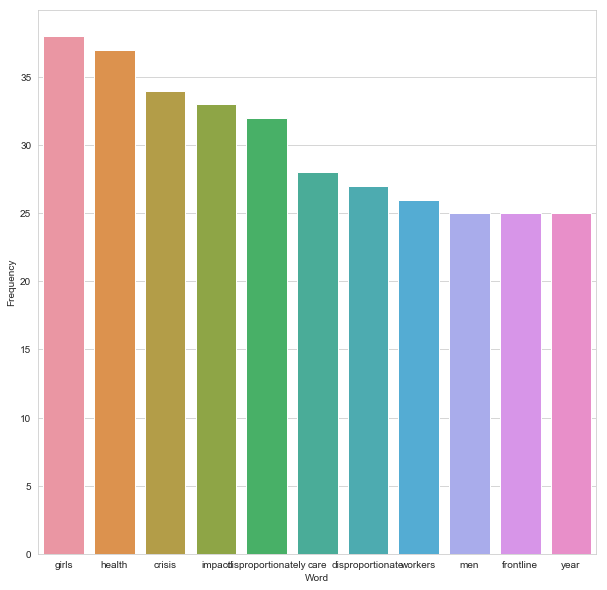

In [75]:
top_N = 100

a_neg = neg_women_tweets['text'].str.lower().str.cat(sep=' ')
b_neg = re.sub('[^A-Za-z]+', ' ', a_neg)

#remove the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_neg = word_tokenize(b_neg)
filtered_sentence_neg = [w for w in word_tokens_neg if not w in stop_words]
filtered_sentence_neg = []
for w in word_tokens_neg:
    if w not in stop_words:
        filtered_sentence_neg.append(w)

# Remove characters which have length less than 2  
without_single_chr_neg = [word for word in filtered_sentence_neg if len(word) > 2]

# Remove numbers
cleaned_tweet_neg = [word for word in without_single_chr_neg if not word.isnumeric()]        

# Calculate distribution
word_dist_neg = nltk.FreqDist(cleaned_tweet_neg)
rslt_neg = pd.DataFrame(word_dist_neg.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt_neg[5:16])

In [71]:
rslt_neg.head(25)

,Word,Frequency
0,women,503
1,covid,348
2,pandemic,114
3,internationalwomensday,64
4,iwd,52
5,girls,38
6,health,37
7,crisis,34
8,impact,33
9,disproportionately,32


In [88]:
cleaned_tweet_neg_uncommon = [word for word in cleaned_tweet_neg if word not in common_words]

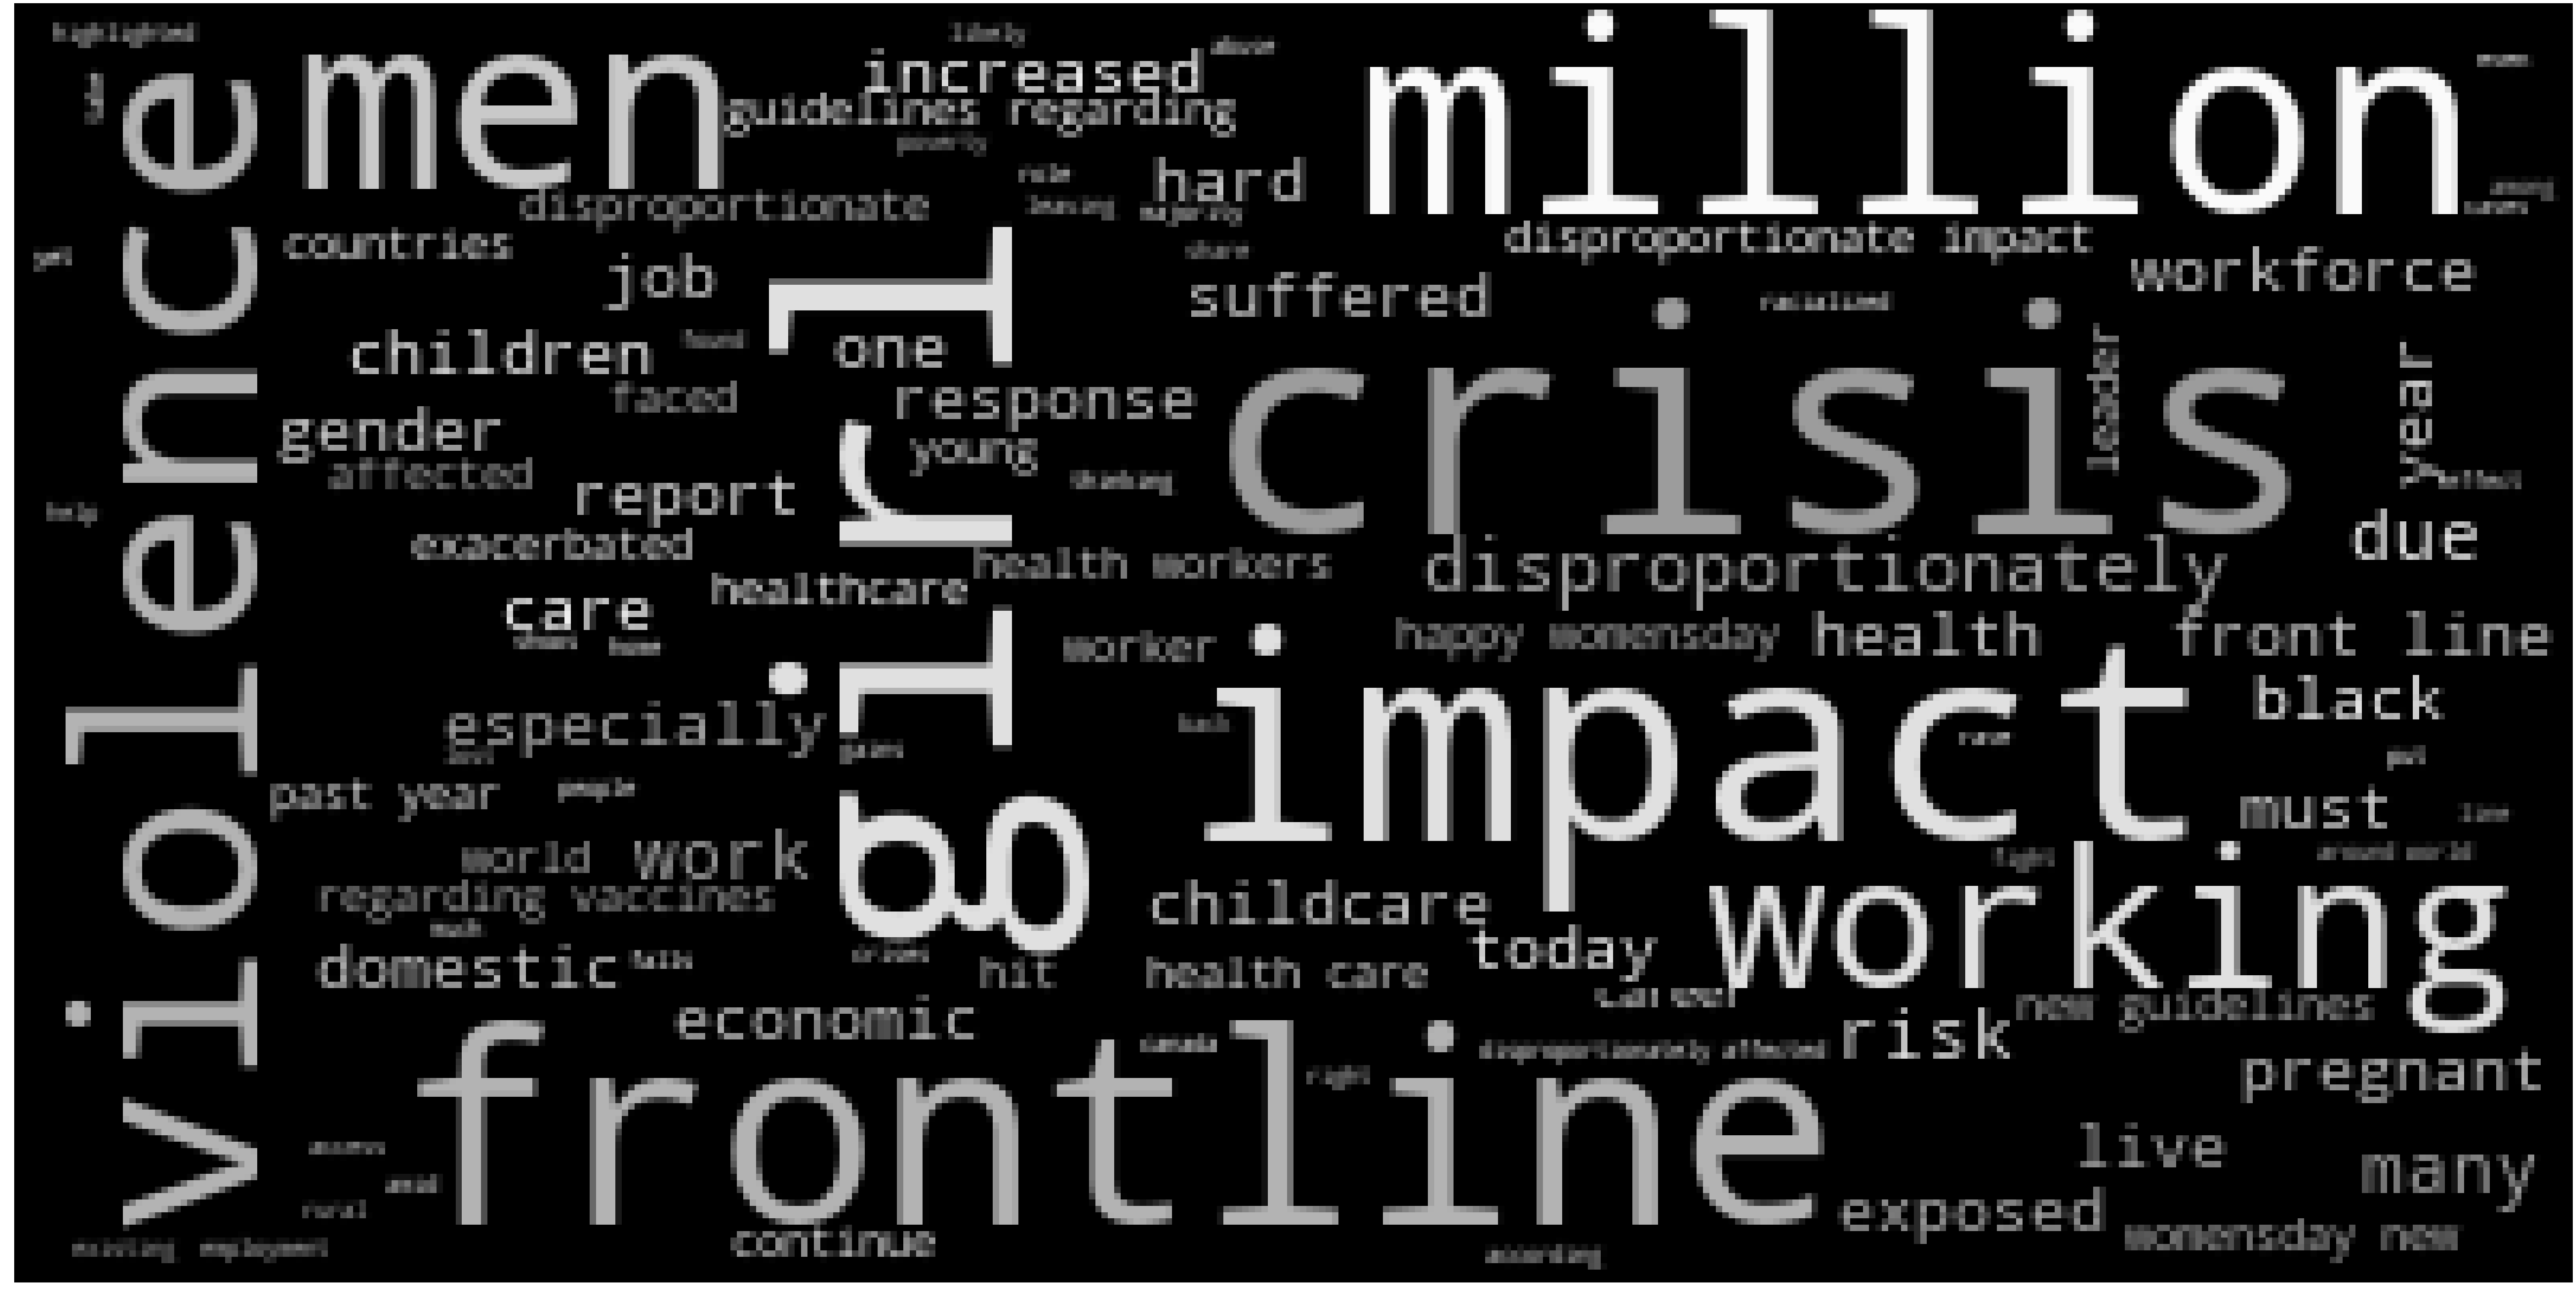

In [183]:
# Top words on tweets
wc(cleaned_tweet_neg_uncommon,'black','Common Words' )

In [196]:
# Sample tweets based on certain words
pd.DataFrame(neg_women_tweets[(neg_women_tweets['text'].str.contains('care')) & (tweet_sentiment['sentiment']=='negative')]['text']).sample(5)

C:\Users\willm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,text
2023,Launching iwd2021 with this evidence review on the impact of Covid19 on the childcare crises Honoured to have co Lerhrp37PT
342,As mothers exit work to care for children the COVID19 crisis is leaving women economically insecure and is threat co YJpUckY1km
667,Covid childcare crisis reversing decades of women s economic progress reportCOVID19 DoubleXEconomy co fMwO6c2iNA
81,Challenging and yet rewarding On InternationalWomensDay women frontline and healthcare personnel in the United Kingdom sh
1028,Half of women in cybersecurity report positive career impact from COVID19 co E3nM4ELl10


##### Find tweets with most common words

In [184]:
top_neg = list(rslt_neg.iloc[5:,0])

word_set = set(chain.from_iterable(top_neg))
res = [len(word_set & set(text.split())) for text in neg_women_tweets['text']]

pd.concat([neg_women_tweets['text'].reset_index(drop=True), pd.DataFrame(res)], axis=1).sort_values(by=0, ascending=False).head(15)

,text,0
276,2 out of 3 caregivers in the U S are women We know caring for a friend or loved one isn t always easy Here are s co IOUiOiPGKS,3
398,There is a special place in hell for women who don t help other women Madeleine Albright Where s YOUR feminist respon,3
169,Violence against women was not considered a priority in the fight against COVID19 in many countries In Nepal the Women s Minis,2
390,Please This women DlaminiZuma is like a bad rash More harmful than COVID19 She just won t go away co wv92Kh80Aq,2
432,ACP UE JPA Women s Forum calls for all governments to make prevention and redress of violenceaginstwomen a key co RQVFUKcXt0,2
431,ACP UE JPA Women s Forum calls for all governments to make prevention and redress of violenceaginstwomen a key part of,2
132,We can t let the COVID19 pandemic reverse the hard won gains for women s rights GenerationEquality is pushing back ag,2
419,If we re to have any chance of ensuring women don t lose out further because of the COVID19 crisis we need to k co agVQnOQRUb,2
41,If we re to have any chance of ensuring women don t lose out further because of the COVID19 crisis we need to k co agVQnOQRUb,2
245,70 of health workers are women but policymakers at Covid response left out women s protection We had to create a safegu,2


# 4. Sentiment Segment Analysis

## 4a. Sentiment by # Tweets

In [212]:
df_wSentiment = pd.concat([total_df.reset_index(drop=True),tweet_sentiment['sentiment']], axis=1)

In [219]:
df_wSentiment['tweets'].describe()

count    2.025000e+03
mean     2.837379e+04
std      1.085178e+05
min      4.000000e+00
25%      1.388000e+03
50%      4.685000e+03
75%      1.578400e+04
max      2.804002e+06
Name: tweets, dtype: float64

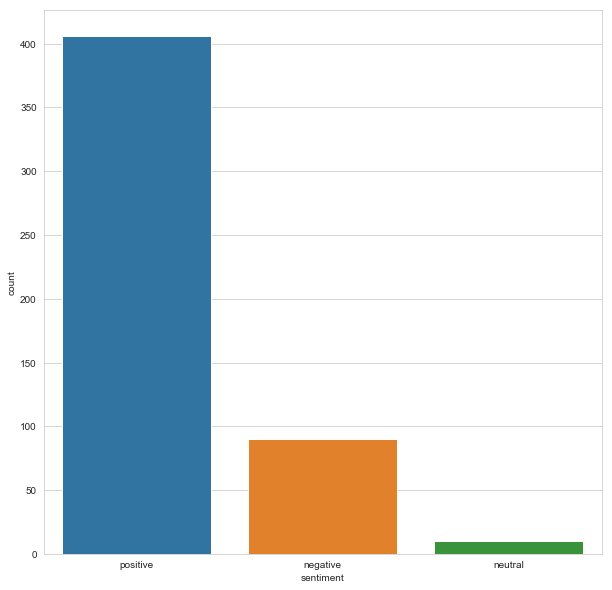

In [220]:
df_wSentiment_low = df_wSentiment[df_wSentiment['tweets'] < 1388]

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment", data=df_wSentiment_low)

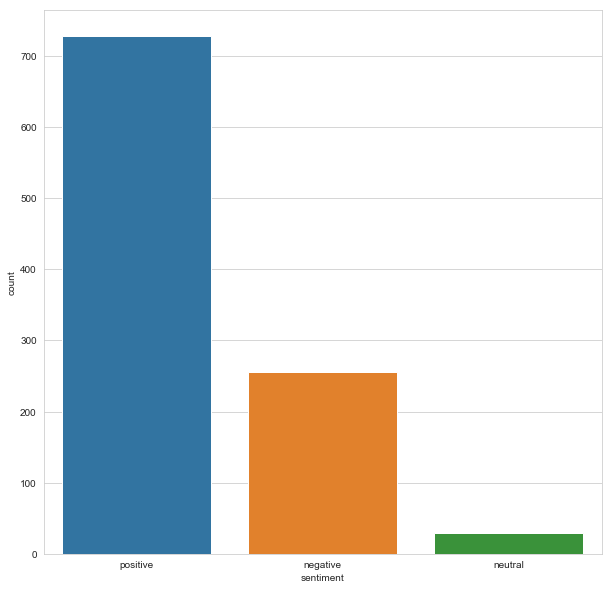

In [221]:
df_wSentiment_med = df_wSentiment[(df_wSentiment['tweets'] < 15784) & (df_wSentiment['tweets'] >= 1388)]

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment", data=df_wSentiment_med)

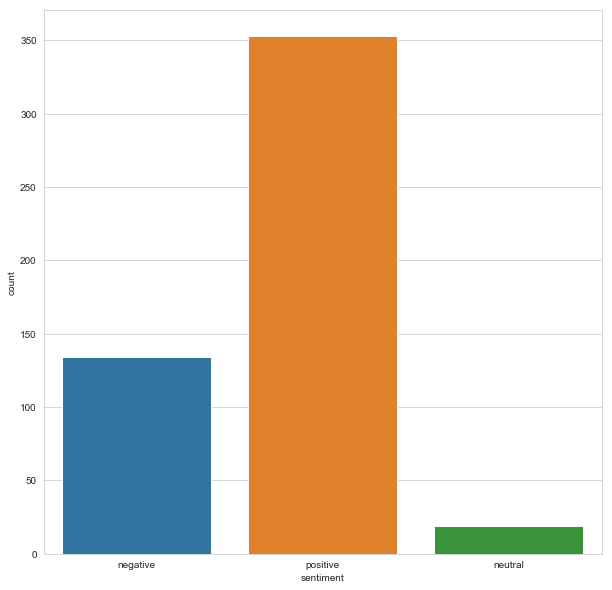

In [222]:
df_wSentiment_high = df_wSentiment[(df_wSentiment['tweets'] > 15784)]

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment", data=df_wSentiment_high)

In [223]:
print('Low # Tweets:\n',df_wSentiment_low['sentiment'].value_counts())
print('Med # Tweets:\n',df_wSentiment_med['sentiment'].value_counts())
print('High # Tweets:\n',df_wSentiment_high['sentiment'].value_counts())

Low # Tweets:
 positive    406
negative     90
neutral      10
Name: sentiment, dtype: int64
Med # Tweets:
 positive    728
negative    255
neutral      29
Name: sentiment, dtype: int64
High # Tweets:
 positive    353
negative    134
neutral      19
Name: sentiment, dtype: int64


#### No major difference in sentiment across tweet level, users with lower tweets are slightly more likely to be positive

## 4b. Sentiment by Location

In [226]:
df_wSentiment['user loc'].value_counts().head(50)

Washington, DC             77
New York, NY               46
Canada                     37
Global                     34
Geneva, Switzerland        25
Washington, D.C.           21
New York, USA              20
Toronto, Ontario           17
Paris, France              13
Ottawa, Ontario            12
London                     12
London, England            12
Brussels                   11
United Kingdom             10
Nigeria                     9
Brussels, Belgium           9
New York City               8
Worldwide                   8
United States               8
Los Angeles, CA             8
Cape Town, South Africa     7
Boston, MA                  7
London, UK                  7
Toronto                     7
UK                          7
Paris                       7
കേരളം                       6
South Africa                6
New York                    6
Toronto, Canada             6
San Francisco, CA           6
New Delhi, India            6
Nairobi, Kenya              6
Ontario, C

In [227]:
US = ['United States','Arlington, VA','Boston, MA','Chicago, IL','Los Angeles, CA','Minnesota, USA','New York','New York City','New York, NY','New York, USA','San Francisco, CA','Seattle, WA','Washington, D.C.','Washington, DC']
Canada = ['Canada','Toronto','Toronto, Canada','Toronto, Ontario','Ontario, Canada','Ottawa, Ontario']
Europe = ['UK','United Kingdom','Leeds, England','London','London, England','London, UK','Manchester','Dublin City, Ireland','Glasgow','Brussels','Brussels, Belgium','France','Geneva, Switzerland','Paris','Paris, France']
Africa = ['Africa','Mogadishu-Somalia','Nairobi, Kenya','Cape Town, South Africa','East Africa','Nigeria','Senegal','South Africa']

In [234]:
df_wSentiment_US = df_wSentiment[df_wSentiment['user loc'].isin(US)]
df_wSentiment_Canada = df_wSentiment[df_wSentiment['user loc'].isin(Canada)]
df_wSentiment_Europe = df_wSentiment[df_wSentiment['user loc'].isin(Europe)]
df_wSentiment_Africa = df_wSentiment[df_wSentiment['user loc'].isin(Africa)]
print(df_wSentiment_US.shape)
print(df_wSentiment_Canada.shape)
print(df_wSentiment_Europe.shape)
print(df_wSentiment_Africa.shape)

(227, 14)
(85, 14)
(138, 14)
(47, 14)


In [232]:
print('US # Tweets:\n',df_wSentiment_US['sentiment'].value_counts(),'\n')
print('Canada # Tweets:\n',df_wSentiment_Canada['sentiment'].value_counts(),'\n')
print('Europe # Tweets:\n',df_wSentiment_Europe['sentiment'].value_counts(),'\n')
print('Africa # Tweets:\n',df_wSentiment_Africa['sentiment'].value_counts(),'\n')

US # Tweets:
 positive    161
negative     54
neutral      12
Name: sentiment, dtype: int64 

Canada # Tweets:
 positive    61
negative    20
neutral      4
Name: sentiment, dtype: int64 

Europe # Tweets:
 positive    105
negative     30
neutral       3
Name: sentiment, dtype: int64 

Africa # Tweets:
 positive    44
negative     3
Name: sentiment, dtype: int64 



#### No major difference in sentiment across locations

# 5. Key Word Analysis

## 5a. Common + and - words

#### Total Sentiment Summary

In [243]:
df_wSentiment['sentiment'].value_counts()

positive    1488
negative     479
neutral       58
Name: sentiment, dtype: int64

In [257]:
total = np.array(df_wSentiment['sentiment'].value_counts())
total_perc = total/total.sum(axis=0)*100
total_perc

array([73.48148148, 23.65432099,  2.86419753])

#### pandemic

In [278]:
df_wSentiment_pandemic = df_wSentiment[df_wSentiment['text'].str.contains('pandemic')]
total_pandemic = np.array(df_wSentiment_pandemic['sentiment'].value_counts())
total_pandemic_perc = total_pandemic/total_pandemic.sum(axis=0)*100
total_pandemic_perc/total_perc*100

array([ 69.11591948, 193.06955107, 123.71029052])

#### Impact

In [258]:
df_wSentiment_impact = df_wSentiment[df_wSentiment['text'].str.contains('impact')]
total_impact = np.array(df_wSentiment_impact['sentiment'].value_counts())
total_impact_perc = total_impact/total_impact.sum(axis=0)*100
total_impact_perc/total_perc*100

array([ 96.48617512, 107.36653743, 129.31034483])

#### Girls

In [260]:
df_wSentiment_girls = df_wSentiment[df_wSentiment['text'].str.contains('girls')]
total_girls = np.array(df_wSentiment_girls['sentiment'].value_counts())
total_girls_perc = total_girls/total_girls.sum(axis=0)*100
total_girls_perc/total_perc*100

array([ 95.9474356 , 112.53210375, 100.47134706])

#### health

In [261]:
df_wSentiment_health = df_wSentiment[df_wSentiment['text'].str.contains('health')]
total_health = np.array(df_wSentiment_health['sentiment'].value_counts())
total_health_perc = total_health/total_health.sum(axis=0)*100
total_health_perc/total_perc*100

array([ 89.40134212, 132.68975816, 101.93808205])

#### year

In [262]:
df_wSentiment_year = df_wSentiment[df_wSentiment['text'].str.contains('year')]
total_year = np.array(df_wSentiment_year['sentiment'].value_counts())
total_year_perc = total_year/total_year.sum(axis=0)*100
total_year_perc/total_perc*100

array([ 92.10043988, 123.83754033, 105.79937304])

#### pandemic, health & year overindex in negative sentiment

In [279]:
df_wSentiment[df_wSentiment['text'].str.contains('pandemic')][['text','sentiment']].sample(10)

,text,sentiment
903,This InternationalWomensDay is about celebrating women s leadership throughout the COVID19 pandemic Thank you t co VbnnoVeLbv,positive
1099,We know that the COVID19 pandemic has had a greater impact on women and racialized women in particular We must continue t,positive
880,Research conducted has found that almost half of women are concerned about burnout following the pandemic with ove co 2gF9sXzBsi,negative
35,Creating a postpandemic recovery for women in the workplace co v7mf8gFhj8 Coronavirus Covid19 co ZLcdU0Vm2h,positive
1846,Blue portraits of by women way before COVID19 during this coronaviruspandemic thenandnow co ELDA4X0w2W,positive
694,Covid19 has disproportionately impacted women Why are women bearing the brunt of the pandemic how can we change co E14RScosGx,negative
1634,Over the past year women have witnessed tremendous difficulties fighting against the COVID19 pandemic its reper co DV50HQsUCF,negative
985,The COVID19 pandemic has shown that women are effective leaders of violence reduction efforts in urban spaces aro co gG8ABr7DAt,negative
279,The pandemic is pushing people women overwhelmingly most of them Black and brown millions of them mothers out co RBPWRwAD9s,negative
569,Pregnancy is not put on pause in the COVID19 pandemic and neither are fundamental human rights All women have th co YcfBasHa9x,negative


In [277]:
df_wSentiment[df_wSentiment['text'].str.contains('health')][['text','sentiment']].sample(10)

,text,sentiment
2011,Investment in maternal neonatal and child health must be a priority in building resilient societies after COVID19 co pR2iwdeskq,negative
1579,Covid19 affecting women s income health security co VxflJ4eEYv,negative
104,Happy InternationalWomensDay Gwent Test Trace and Protect Service Celebrating women working in healthc,positive
1227,On this WomensDay we celebrate women s contributions to healthforall particularly during the COVID19 pandemic As m,positive
662,Past experience shows that rural women are disproportionally affected by health and economic crisesClick here for co un68ZEBsMg,negative
1220,It s InternationalWomensDay helps women manage their health at every stage of life We sal co Hi4RGEGEPF,positive
563,On InternationalWomensDay we must recognize the women on the frontlines of the COVID19 crisis as health care worker,negative
767,On InternationalWomensDay we must recognize the women on the frontlines of the COVID19 crisis as health care w co LgBUNeBoFN,negative
450,From heads of state to researchers health care workers women leaders are the frontline of defense against COVID19,positive
233,The intersection of long haul COVID19 misogynoirBlack women s health complaints are often not taken seriously,negative


In [273]:
df_wSentiment[df_wSentiment['text'].str.contains('year')][['text','sentiment']].sample(10)

,text,sentiment
1554,This year IWD2021 celebrates women in leadership Bronwyn oversees FLOCERT operations in Africa and the Middle East,positive
1840,A year of COVID19 how it started how it s still going women dogs WomensHistoryMonth co YOHQuCRXua,positive
1247,Many women have faced more behavioral health challenges in the last year due to COVID19 On this InternationalWomensDay an,negative
391,On 8 March every year joins the world to celebrate InternationalWomensDay to recognize the achievements of women and,positive
1240,Makovsky recognizes the endless contributions achievements of women across the globe According to this year s theme f,positive
1191,The past year has been extremely difficult for women They ve faced job losses served on the front lines of the pa co 3RipcwKi2h,negative
704,I feel about IWD2021 I ve seen so many women struggle to do it all this year Women in care professions have been,positive
1725,New data reveal that nearly 12 million women in 115 countries lost access to contraception in the past year co SOXrUPoTuD,negative
1368,Here s a message from our own thanking the women of TeamOldham for all they ve done over the past year co e8jVbvxJbs,positive
432,After years of chronic underfunding of First Nations Indigenous women girls are experiencing heightened l co EgVbzJvzqp,negative


## 5. Unique Words between sentiments

In [280]:
posWords = rslt_pos.loc[:,'Word']
negWords = rslt_neg.loc[:,'Word']

In [282]:
positive_fd = nltk.FreqDist(posWords)
negative_fd = nltk.FreqDist(negWords)

positive_fd

FreqDist({'women': 1, 'covid': 1, 'internationalwomensday': 1, 'iwd': 1, 'celebrate': 1, 'day': 1, 'today': 1, 'happy': 1, 'pandemic': 1, 'leadership': 1, ...})

In [283]:
common_set = set(positive_fd).intersection(negative_fd)
common_set

{'affected',
 'around',
 'care',
 'covid',
 'crisis',
 'disproportionate',
 'disproportionately',
 'economic',
 'efforts',
 'especially',
 'face',
 'fight',
 'front',
 'frontlines',
 'gender',
 'girls',
 'happy',
 'health',
 'help',
 'impact',
 'internationalwomensday',
 'iwd',
 'leaders',
 'let',
 'made',
 'make',
 'many',
 'men',
 'must',
 'need',
 'new',
 'one',
 'pandemic',
 'recognize',
 'research',
 'response',
 'today',
 'women',
 'womensday',
 'work',
 'workers',
 'working',
 'world',
 'year'}

In [284]:
for word in common_set:
    del positive_fd[word]
    del negative_fd[word]
      
top_positive = {word for word, count in positive_fd.most_common(100)}
top_negative = {word for word, count in negative_fd.most_common(100)}

In [293]:
rslt_pos[pd.DataFrame(rslt_pos.Word.tolist()).isin(top_positive).any(1).values].head(20)

,Word,Frequency
4,celebrate,213
5,day,178
9,leadership,124
10,celebrating,114
13,international,104
16,future,73
23,equal,64
24,recovery,63
26,join,56
27,thank,53


In [294]:
rslt_neg[pd.DataFrame(rslt_neg.Word.tolist()).isin(top_negative).any(1).values].head(20)

,Word,Frequency
14,frontline,25
18,violence,21
23,line,17
24,due,17
27,job,14
28,workforce,14
30,risk,14
32,poverty,14
34,suffered,13
35,hard,13
